# Aula 13 - Apredizado Supervisionado (Regressão)




In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Toy example - Regressão linear e polinomial

In [16]:
# Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [20]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [21]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [18]:
# Vamos dar uma olhada rápida no conteúdo desse dataset. 
# É um dataset muito simples, apenas para guiar nosso entendimento
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
dataset.shape

In [28]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [27]:
y.shape

(10,)

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

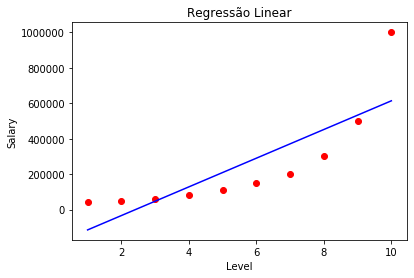

In [19]:
# visualizando o resultado
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Regressão Linear')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [23]:
# ajustando uma regressao polinomial
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

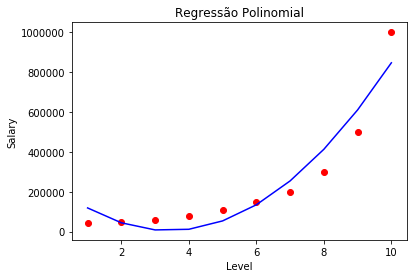

In [25]:
plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Regressão Polinomial')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Prevendo um caso com regressão linear
# o que vc acha do resultado?
lin_reg.predict([[5.5]])

In [29]:
print (lin_reg.predict([[5.5]]))

[249500.]


In [ ]:
# Prevendo um caso com a regressão polinomial
# e esse? melhor ou pior?
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

In [30]:
print (pol_reg.predict(poly_reg.fit_transform([[5.5]])))

[89187.5]


## Boston Housing - Uma base um pouquinho maior

In [ ]:
from sklearn.datasets import load_boston
boston_housing = load_boston()

In [ ]:
print(boston_housing.DESCR) #ve uma descricao do dataset

In [ ]:
boston = pd.DataFrame(boston_housing.data)
boston.head()

In [ ]:
boston.columns = boston_housing.feature_names
boston.head()

In [ ]:
boston_housing.target[:5]

In [ ]:
boston['PRICE'] = boston_housing.target

In [ ]:
boston.head()

In [ ]:
X = boston.drop('PRICE', axis=1)
X.head()

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, boston.PRICE, test_size=0.3, random_state=1)

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

In [ ]:
pred_train = linear_reg.predict(X_train)
pred_test = linear_reg.predict(X_test)


In [ ]:
# depois de feita a regressão, vamos calcular o MSE no treino e no teste
print(np.mean((y_train - pred_train) ** 2)) #erro medio ao quadrado
print(np.mean((y_test - pred_test) ** 2))

## Mãos à Obra!

- Regressão Linear
- Regressão Linear com regularização
  - Ridge
  - Lasso
  - Elastic Net

Ref: [Regressão Linear com sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [ ]:
dataset = pd.read_csv("text.csv")
dataset.head(5)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

In [ ]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

## Desafio!

[Housing Prices at Kaggle!](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

